92141.0


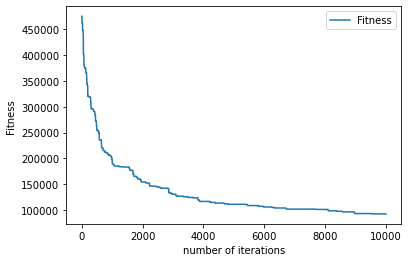

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(50)
#finding fitness of a solution

def find_fitness(list1,b1,b):
    
    l1=[0] * b
   
    counter=0
    for i in b1:
        l1[int(i)]+=list1[counter]
        counter+=1
    diff=max(l1)-min(l1)

    return diff


#chosing random solution as parent

def tournament_method(df,n):
    d2=df.copy()
    
    var1=random.randint(0,9)
    var2=random.randint(0,9)
    
    #extracting the fitness

    temp1=d2.iat[n,var1]
    temp2=d2.iat[n,var2]

    #chosing the fittest

    if temp1<=temp2:
        dataset=d2.iloc[:,var1]
    else:
        dataset=d2.iloc[:,var2]
    return dataset

#updating the solutions with children
def update_df(df,least_fit_sol,dataset,n):
    
    idx=str(least_fit_sol+1)
    for i in range(n+1):
        df[idx][i]=dataset[i]
    


#Entering specs

n=500

b=100

#creating list of weights
list1=[]
for i in range(1,n+1):
    list1.append(round((i**2)/2,4))
#print('list of weights: ')
#print(list1)

#creating initial solution

b1=[random.randint(0,b-1) for i in range(n)]

fit=find_fitness(list1,b1,b)
b1.append(fit)

d={'1':b1}
df=pd.DataFrame(d)

#creating population

for i in range(9):
    temp=str(i+2)
    bi=[random.randint(0,b-1) for i in range(n)]
    fit=find_fitness(list1,bi,b)
    bi.append(fit)
    df.loc[:,temp]=bi

#print(df)

Xvalue=[]

for j in range(10000):
    #find parents

    dataset=tournament_method(df,n)
    dataset2=tournament_method(df,n)
    #print("parent1")
    #print(dataset)
    #print("parent2")
    #print(dataset2)

   
    #select mutation point and drop the fitness
    for i in range(5):
        mut_pnt=random.randint(0,n-1)
        dataset.iloc[mut_pnt]=random.randint(0,b-1)
        dataset2.iloc[mut_pnt]=random.randint(0,b-1)
        
    temp_dataset=dataset.copy()
    temp_dataset=temp_dataset.drop(index=n)
    temp_dataset2=dataset2.copy()
    temp_dataset2=temp_dataset2.drop(index=n)



    #compute fitness

    fit1=find_fitness(list1,temp_dataset,b)
    dataset.iloc[n]=fit1
    #print("dataset")
    #print(dataset)
    fit2=find_fitness(list1,temp_dataset2,b)
    dataset2.iloc[n]=fit2
    #print("dataset2")
    #print(dataset2)

    #extract the fitness from dataframe and convert to list
    X=df.iloc[n]
    X=X.values.tolist()
    #find the least fit & second least fit
    least_fit_sol=np.argsort(X)[-1]
    second_least_fit_sol=np.argsort(X)[-2]

    #updating the solution with new children

    if fit1>fit2:
    
        if fit1<=X[second_least_fit_sol]:
            update_df(df,least_fit_sol,dataset,n)
            update_df(df,second_least_fit_sol,dataset2,n)
        if fit2<=X[second_least_fit_sol] and fit1<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset,n)
            update_df(df,second_least_fit_sol,dataset2,n)
        if fit2>X[second_least_fit_sol] and fit1<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset2,n)
        if fit2<=X[least_fit_sol] and fit2<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset2,n) 

    else:
        if fit2<=X[second_least_fit_sol]:
            update_df(df,least_fit_sol,dataset2,n)
            update_df(df,second_least_fit_sol,dataset,n)
        if fit1<=X[second_least_fit_sol] and fit2<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset,n)
            update_df(df,second_least_fit_sol,dataset2,n)
        if fit1>X[second_least_fit_sol] and fit2<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset,n)
        if fit1<=X[least_fit_sol] and fit1<=X[least_fit_sol]:
            update_df(df,least_fit_sol,dataset,n)
    
    #extract the fitness from dataframe and convert to list
    Y=df.iloc[n]
    Y=Y.values.tolist()
    #find the best solution
    best_fit_sol=np.argsort(Y)[0]
    idx=str(best_fit_sol+1)
    solution=[]
    for i in range(n+1):
        solution.append(df[idx][i])
        
    Xvalue.append(df[idx][n])


print(Xvalue[-1])
plt.plot(range(10000),Xvalue,label = "Fitness")
plt.xlabel("number of iterations")
plt.ylabel("Fitness ")
plt.legend()
plt.show()